<h1>Assignment 5</h1>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [23]:
data=pd.read_csv('data25_01.csv')
data

,X1,X2,Y
0,4.912069,2.034193,7.099346
1,4.970952,2.115992,7.146302
2,5.645921,2.024459,7.628298
3,5.180944,2.204340,7.343637
4,4.748189,1.985896,6.715205
...,...,...,...
295,5.442993,1.954308,7.405694
296,5.365162,2.435008,7.726488
297,5.424733,2.197736,7.680230
298,4.068459,1.964268,6.110611


In [24]:
data.dropna()

,X1,X2,Y
0,4.912069,2.034193,7.099346
1,4.970952,2.115992,7.146302
2,5.645921,2.024459,7.628298
3,5.180944,2.204340,7.343637
4,4.748189,1.985896,6.715205
...,...,...,...
295,5.442993,1.954308,7.405694
296,5.365162,2.435008,7.726488
297,5.424733,2.197736,7.680230
298,4.068459,1.964268,6.110611


<h1>Spliting the data into training (80)% and testing 20% 
</h1>

In [26]:
train_size= int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]


<h1>Seperating the independent and depedent variable</h1>

In [28]:
#independent
X1_train = train_data[['X1']]
X2_train = train_data[['X2']]
#dependent
Y_train = train_data[['Y']]


In [29]:
#independent
X1_test = test_data[['X1']]
X2_test = test_data[['X2']]
#dependent
Y_test = test_data['Y']
Y_test

240    7.226695
241    6.348097
242    5.704139
243    6.742232
244    7.266014
245    6.684136
246    6.973504
247    6.953160
248    7.269014
249    6.837510
250    7.259559
251    6.195852
252    7.545513
253    7.213028
254    6.850431
255    6.998540
256    7.345431
257    7.552993
258    7.044076
259    7.809874
260    6.518898
261    6.703441
262    6.424721
263    7.590166
264    7.815016
265    7.010137
266    7.285146
267    7.365328
268    7.132525
269    6.909597
270    7.261772
271    6.398992
272    7.825150
273    7.263401
274    6.245224
275    7.177316
276    6.871654
277    6.767535
278    6.481203
279    6.948069
280    6.912862
281    7.693801
282    6.153294
283    7.755744
284    7.035551
285    7.389458
286    7.513397
287    7.093754
288    6.510578
289    6.704832
290    6.697474
291    6.807609
292    7.036560
293    6.784224
294    6.638014
295    7.405694
296    7.726488
297    7.680230
298    6.110611
299    6.909933
Name: Y, dtype: float64

<h1>Adding constant column to the independent variables for the intercept</h1>

In [31]:
X1_train_const = sm.add_constant(X1_train)
X2_train_const = sm.add_constant(pd.concat([X1_train,X2_train],axis=1))

<h1>Fit the first model</h1>

In [33]:
model_X1= sm.OLS(Y_train,X1_train_const).fit()

In [34]:
model_X1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     757.8
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           6.32e-76
Time:                        16:54:38   Log-Likelihood:                 16.055
No. Observations:                 240   AIC:                            -28.11
Df Residuals:                     238   BIC:                            -21.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8832      0.186     10.099      0.000       1.516       2.251
X1             1.0228      0.037     27.529      0.000       0.950       1.096
==============================================================================
Omnibus:                        0.683   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.711   Jarque-Bera (JB):                0.410
Skew:                           0.043   Prob(JB):                        0.815
Kurtosis:                       3.183   Cond. No.                         66.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>Fit the Second model (with X1 and X2)</h1>

In [36]:
model_X1_X2 = sm.OLS(Y_train,X2_train_const).fit()

In [37]:
model_X1_X2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     2375.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          1.61e-157
Time:                        16:54:38   Log-Likelihood:                 209.90
No. Observations:                 240   AIC:                            -413.8
Df Residuals:                     237   BIC:                            -403.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0770      0.102      0.756      0.450      -0.124       0.277
X1             0.9885      0.017     59.406      0.000       0.956       1.021
X2             0.9895      0.032     30.903      0.000       0.926       1.053
==============================================================================
Omnibus:                        2.033   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.777
Skew:                          -0.092   Prob(JB):                        0.411
Kurtosis:                       2.621   Cond. No.                         87.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>Acceping the two-variable model if adjusted R^2 increases</h1>

In [39]:
if model_X1_X2.rsquared_adj > model_X1.rsquared_adj:
    print("Accepted")
    final_model = model_X1_X2
    X_test_const = sm.add_constant(pd.concat([X1_test,X2_test],axis=1))
else:
    print("Model with X1 is better based on adjusted R-squared")
    final_model= model_X1
    X_test_const = sm.add_constant(X1_test)
    

Accepted


<h1>Making predictions</h1>

In [41]:
Y_pred = final_model.predict(X_test_const)
Y_pred

240    7.201655
241    6.346044
242    5.720294
243    6.822638
244    7.224503
245    6.707181
246    6.833291
247    6.953888
248    7.118836
249    6.951088
250    7.391173
251    6.432533
252    7.509925
253    7.202440
254    6.745481
255    6.915887
256    7.498631
257    7.295004
258    7.153632
259    7.743512
260    6.522396
261    6.772662
262    6.672888
263    7.563108
264    7.779697
265    7.020177
266    7.088895
267    7.267427
268    7.145033
269    7.005819
270    7.205511
271    6.563451
272    7.798319
273    7.386014
274    6.272005
275    7.199006
276    6.842354
277    6.850632
278    6.466447
279    7.049925
280    7.006564
281    7.700229
282    6.172179
283    7.753005
284    6.996041
285    7.252062
286    7.422640
287    7.087404
288    6.598240
289    6.898921
290    6.742257
291    6.888792
292    7.078025
293    6.791099
294    6.840534
295    7.391129
296    7.789857
297    7.613957
298    6.042272
299    7.092283
dtype: float64

In [42]:
residuals=Y_test - Y_pred
residuals

240    0.025040
241    0.002052
242   -0.016155
243   -0.080406
244    0.041512
245   -0.023045
246    0.140213
247   -0.000729
248    0.150178
249   -0.113578
250   -0.131614
251   -0.236681
252    0.035588
253    0.010588
254    0.104950
255    0.082653
256   -0.153199
257    0.257989
258   -0.109556
259    0.066362
260   -0.003498
261   -0.069220
262   -0.248168
263    0.027058
264    0.035319
265   -0.010040
266    0.196251
267    0.097901
268   -0.012509
269   -0.096222
270    0.056261
271   -0.164459
272    0.026831
273   -0.122612
274   -0.026782
275   -0.021691
276    0.029300
277   -0.083097
278    0.014756
279   -0.101856
280   -0.093702
281   -0.006428
282   -0.018885
283    0.002739
284    0.039510
285    0.137396
286    0.090757
287    0.006350
288   -0.087662
289   -0.194090
290   -0.044783
291   -0.081183
292   -0.041466
293   -0.006875
294   -0.202520
295    0.014565
296   -0.063370
297    0.066273
298    0.068339
299   -0.182350
dtype: float64

<h1>Residuals Plot</h1>

Residuals Plot for X1_test

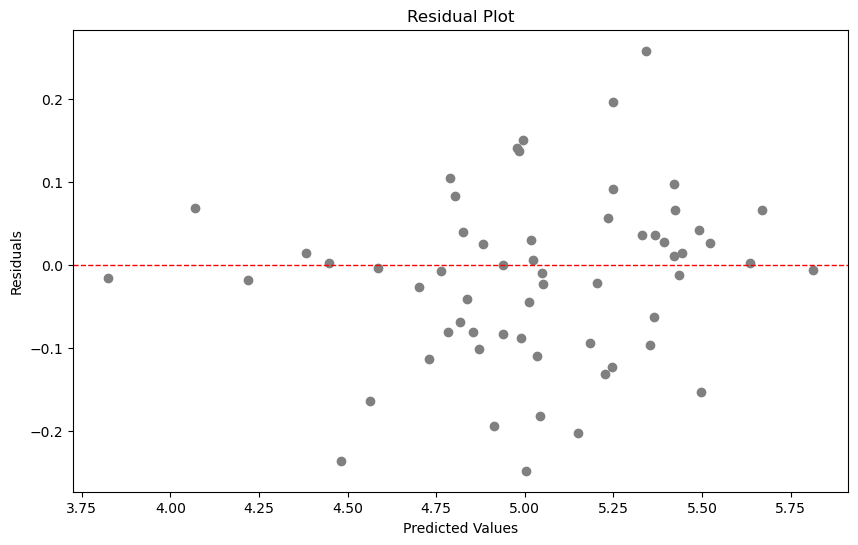

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(X1_test, residuals,color='gray')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

<h1>Residual Plot based on better adjusted R-squared</h1>

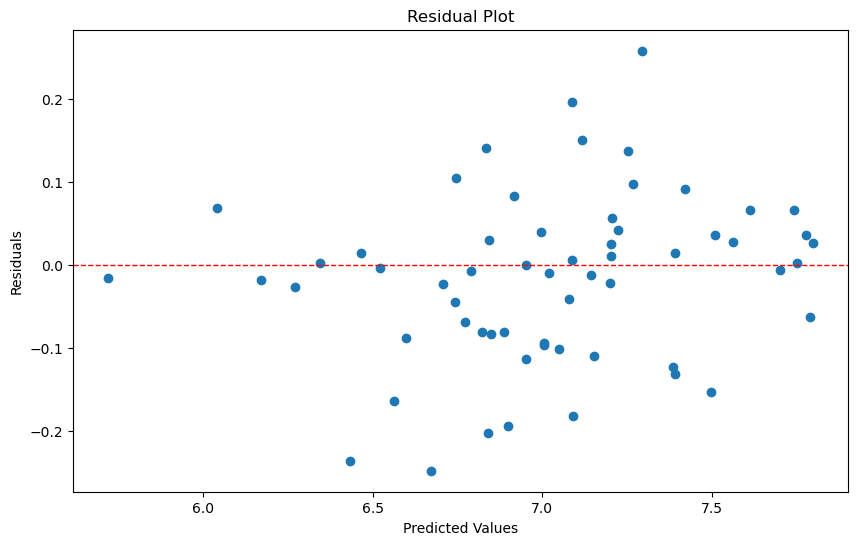

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()